In [1]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

# Seed the random number generator:
np.random.seed(1)

In [2]:
def E(y, predictions):
    return np.sum(np.not_equal(y, predictions)) / len(y)

In [3]:
# Load training text file
Data_train = np.loadtxt('training_data.txt', skiprows = 1)
X_train = Data_train[0:20000, 1:]
y_train = Data_train[0:20000, 0]
X_test = np.loadtxt('test_data.txt', skiprows = 1)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (20000, 1000)
y_train shape: (20000,)


In [4]:
# Normalize training data
for i in range(len(X_train[0])):
    col = X_train[:, i]
    mean = np.mean(col)
    std = np.std(col)
    X_train[:, i] = (col - mean) / std
    X_test[:, i] = (X_test[:,i] - mean) / std
    
print('normalized')

normalized


In [5]:
tuned_parameters = {'n_estimators': [500, 1000], 'max_depth': [50, 100, 150]}
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'accuracy')
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.8321
{'max_depth': 100, 'n_estimators': 500}


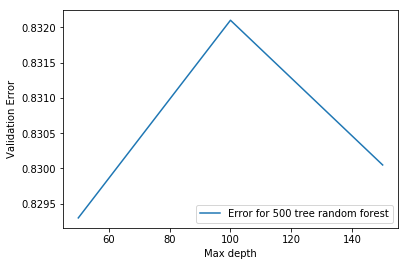

In [16]:
import matplotlib.pyplot as plt
E_vals = clf.cv_results_['mean_test_score']

params = clf.cv_results_['params']
E_vals_500 = [E_vals[i] for i in range(len(params)) if params[i]['n_estimators'] == 500]
E_vals_1000 = [E_vals[i] for i in range(len(params)) if params[i]['n_estimators'] == 1000]

plt.plot([50, 100, 150], E_vals_500, label = "Error for 500 tree random forest")
plt.xlabel("Max depth")
plt.ylabel("Validation Error")
plt.legend()
plt.show()

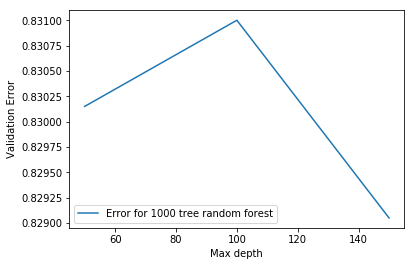

In [17]:
plt.plot([50, 100, 150], E_vals_1000, label = "Error for 1000 tree random forest")
plt.xlabel("Max depth")
plt.ylabel("Validation Error")
plt.legend()
plt.show()

In [ ]:
# Actual training and making predictions
pred = clf.predict(X_test)
submission = [[i+1, int(pred[i])] for i in range(len(pred))]
submission.insert(0, ['Id','Prediction'])
with open('submission_svm.csv', 'w') as f:
    for line in submission:
        f.write(','.join(map(str, line)) + '\n')

In [ ]:
prediction = clf.predict(X_train)
submission = [[i+1, int(prediction[i])] for i in range(len(prediction))]
submission.insert(0, ['Id','Prediction'])
with open('svm_1014pm_prediction_training.csv', 'w') as f:
    for line in submission:
        f.write(','.join(map(str, line)) + '\n')

In [ ]:
pred = clf.predict(X_test)
submission = [[i+1, int(pred[i])] for i in range(len(pred))]
submission.insert(0, ['Id','Prediction'])
with open('svm_1014pm_prediction_testing.csv', 'w') as f:
    for line in submission:
        f.write(','.join(map(str, line)) + '\n')